In [148]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [188]:
#dataset = 'ssc.hg38'
#subtypes = ['current', 'life']

dataset = 'spark'
subtypes = [None]

In [189]:
intervals = np.load('../permutation_tests/phen.%s.intervals.npy' % dataset)
chroms = np.load('../permutation_tests/phen.%s.chroms.npy' % dataset)
print(intervals.shape, chroms.shape)

(2, 386437) (386437,)


In [190]:
chrom_lengths38 = {
	'1': 248956422,
	'2': 242193529,
	'3': 198295559,
	'4': 190214555,
	'5': 181538259,
	'6': 170805979,
	'7': 159345973,
	'8': 145138636,
	'9': 138394717,
	'10': 133797422,
	'11': 135086622,
	'12': 133275309,
	'13': 114364328,
	'14': 107043718,
	'15': 101991189,
	'16': 90338345,
	'17': 83257441,
	'18': 80373285,
	'19': 58617616,
	'20': 64444167,
	'21': 46709983,
	'22': 50818468,
	'X': 156040895,
#	'Y': 57227415
}

chrom_to_offset = dict()
offset = 0
for chrom in range(1, 23):
    chrom_to_offset[chrom] = offset
    offset += chrom_lengths38[str(chrom)]
    
x = intervals[0, :] + np.array([chrom_to_offset[x] for x in chroms])

In [191]:
pvalues = np.ones((40, intervals.shape[1], len(subtypes)))
for j, subtype in enumerate(subtypes):
    for i in range(40):
        filename = '../permutation_tests/scq%d.%s%s.npy' % (i+1, dataset, '' if subtype is None else '.'+subtype)
        try:
            pvalues[i, :, j] = np.load('../permutation_tests/scq%d.%s%s.npy' % (i+1, dataset, '' if subtype is None else '.'+subtype))
        except:
            print(filename, 'not found')
print(pvalues.shape)



(40, 386437, 1)


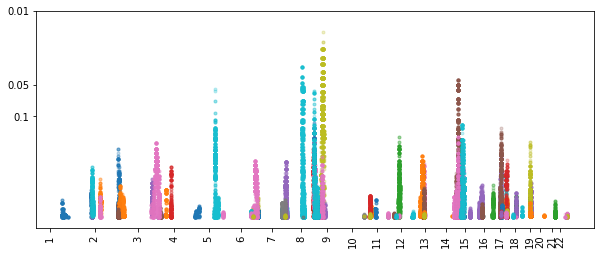

In [195]:
fig, subplots = plt.subplots(1, 1, figsize=(10, 4), sharey=True, sharex=True)

for i in range(40):
    indices = (pvalues[i, :, 0]<0.9)
    subplots.scatter(x[indices], np.clip(-np.log10(pvalues[i, indices, 0]), 0, 3), marker='.', alpha=0.25)
        
    
    
plt.xticks([chrom_to_offset[x] for x in range(1, 23)], [str(x) for x in range(1, 23)], rotation=90)
plt.yticks(-np.log10([0.1, 0.05, 0.01]), ['0.1', '0.05', '0.01'])
plt.show()

In [199]:
combos = list(combinations(np.arange(40), 2))
pvalues_comb = np.ones((len(combos), intervals.shape[1]))
for i, (j, k) in enumerate(combos):
    filename = '../permutation_tests/combinations/scq%d.%d.%s.npy' % (j+1, k+1, dataset)
    try:
        pvalues_comb[i, :] = np.load(filename)
    except:
        print('%s not found' % filename)
    
print(pvalues_comb.shape)

../permutation_tests/combinations/scq1.2.spark.npy not found
../permutation_tests/combinations/scq1.3.spark.npy not found
../permutation_tests/combinations/scq1.4.spark.npy not found
../permutation_tests/combinations/scq1.5.spark.npy not found
../permutation_tests/combinations/scq1.6.spark.npy not found
../permutation_tests/combinations/scq1.7.spark.npy not found
../permutation_tests/combinations/scq1.8.spark.npy not found
../permutation_tests/combinations/scq1.9.spark.npy not found
../permutation_tests/combinations/scq1.10.spark.npy not found
../permutation_tests/combinations/scq1.11.spark.npy not found
../permutation_tests/combinations/scq1.12.spark.npy not found
../permutation_tests/combinations/scq1.13.spark.npy not found
../permutation_tests/combinations/scq1.14.spark.npy not found
../permutation_tests/combinations/scq1.15.spark.npy not found
../permutation_tests/combinations/scq1.16.spark.npy not found
../permutation_tests/combinations/scq1.17.spark.npy not found
../permutation_t

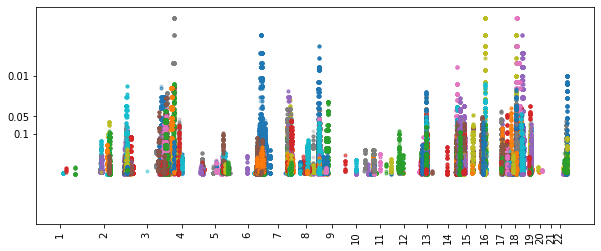

In [200]:
fig, subplots = plt.subplots(1, 1, figsize=(10, 4), sharey=True, sharex=True)

for i in range(len(combos)):
    indices = pvalues_comb[i, :]<0.5
    subplots.scatter(x[indices], np.clip(0, -np.log10(pvalues_comb[i, indices]), 3), marker='.', alpha=0.25)
        
  
plt.xticks([chrom_to_offset[x] for x in range(1, 23)], [str(x) for x in range(1, 23)], rotation=90)
plt.yticks(-np.log10([0.1, 0.05, 0.01]), ['0.1', '0.05', '0.01'])
plt.show()

In [201]:
for i, (j, k) in enumerate(combos):
    if np.any(pvalues_comb[i, :] < 0.01):
        print(j+1, k+1, intervals[:, np.uninp.where(pvalues_comb[i, :] < 0.01)])
    

2 31 [[[150709784 150711346 150727221 150737412 150737968 150740663 150757634
   150808275 150809333 150810723 150812279 150813208 150813815 150823578
   150840804 150850979 150861823 150862962 150863643 150867282 150872383
   150873968 150882262 150901238 150905549 150908176 150908880 150909450
   150917479 150922142 150923518 150924093 150925587 150925716 150927053
   150928525 150931127 150936368 150941138 150945548 150946605 150952236
   150955018 150955591 150955688 150956173 150958101 150960447 150972231
   150973326 150974513 150990018 150990129 150991232 150992723 150993705
   150998964 151003615 151009710 151014804 151023791 151027256 151029118
   151030365 151033490 151034496 151036300 151038560 151040297 151046082
   151048256 151049783 151060465 151063982 151065357 151071051 151074658
   151082655 151083283 151119748 151142974 151149277 151149746 151173775
   151193897 151199214 151225753 151226747 151280369 151289522 151323725
   151336112 151338829 151357138 151357747 151